# $$ ETC.CO_2.Data $$

In [1]:
from pint import UnitRegistry
u = UnitRegistry()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('Indoor_3-3-2016.csv', 
                   skiprows=3,       # ignore the first 3 rows of data
                   sep=';',          # semicolon is used to separate data values
                   index_col=1,      # use column 1 as the dates to index the data
                   parse_dates=True) # convert the date string into a date object
data.head()

Timestamp 
 Temperature 
 Humidity 
 CO2 
 Noise 
 Pressure 
 
 
 Timezone : America/Los_Angeles 
 
 
 
 
 
 
 
 
 
 
 2016-02-22 08:15:00 
 1456157700 
 19.4 
 52 
 410 
 40 
 1020.4 
 
 
 2016-02-22 08:45:00 
 1456159500 
 19.4 
 52 
 408 
 40 
 1020.1 
 
 
 2016-02-22 09:15:00 
 1456161300 
 19.6 
 52 
 416 
 40 
 1020.0 
 
 
 2016-02-22 09:45:00 
 1456163100 
 19.6 
 52 
 428 
 43 
 1019.9 
 
 
 2016-02-22 10:15:00 
 1456164900 
 19.7 
 52 
 441 
 39 
 1019.8

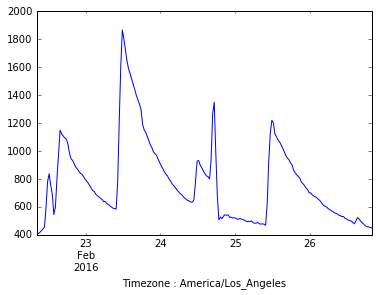

In [5]:
data['CO2'].plot()

In [4]:
import bokeh.plotting as bkp
bkp.output_notebook()
p = bkp.figure(x_axis_type='datetime')
p.line(y=data['CO2'], x=data.index)
bkp.show(p)

Loading BokehJS ...

<Bokeh Notebook handle for In[4] >

In [0]:
time2 = '2016-02-22 09:15:00'
time1 = '2016-02-22 08:45:00'
rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])

rise/run

In [0]:
time2 = '2016-02-23 09:15:00'
time1 = '2016-02-23 08:45:00'
rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])

rise/run

In [0]:
def process_data(begin, end, data, plot=False):
    x = data['Timestamp'][begin:end]
    x = x - x[0]
    y = data['CO2'][begin:end]

    fit = np.polyfit(x,y,1)
    room_ppm_per_second = fit[0]
    room_ppm_per_minute = room_ppm_per_second * 60
    ppm_per_student_per_minute = 0.176
    num_students = room_ppm_per_minute / ppm_per_student_per_minute

    if plot:
        yfit = np.polyval(fit, x)
        plt.plot(x, y)
        plt.plot(x, yfit)

    print('Start time = {}'.format(begin))
    print('End time = {}'.format(end))
    print('Carbon dioxide rate of increase {:.2f} ppm per minute'.format(room_ppm_per_minute))    
    print('Estimated number of students: {:.0f}'.format(num_students))
    print()

Class times for Spring 2016 for ENSP 430 and 437

In [0]:
class_starts = (
                ('2016-02-23 10:00', '2016-02-23 12:00'),
                ('2016-02-24 14:00', '2016-02-24 17:50'),
                ('2016-02-25 10:00', '2016-02-25 12:00')
               )

for begin, end in class_starts:
    process_data(begin, end, data, plot=True)
plt.show()

In [0]:
data.head()

In [0]:
data.head()

In [0]:
data.plot()